## Bifurcation diagrams of the Stommel box model

Import packages:

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from numpy.polynomial import Polynomial as pol
import matplotlib.lines as mlines

Import own modules:

In [2]:
import import_ipynb
from COSMETICS import *
from SETUP import f, J

importing Jupyter notebook from COSMETICS.ipynb
importing Jupyter notebook from SETUP.ipynb


Bifurcation diagram of the Stommel box model for varying values of $\eta_1$:

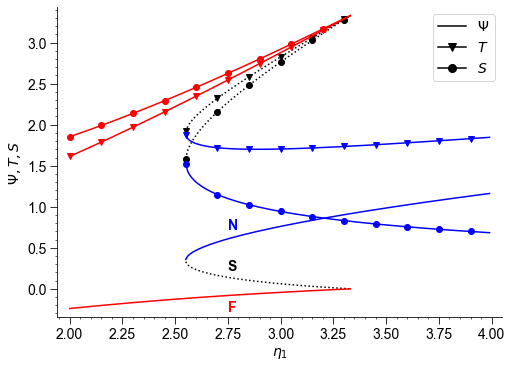

In [4]:
e2=1.0
e3=0.3
e1range = np.arange(2, 4, 0.01) # range of values of eta_1

# Here, we initialise lists for each different type of equilibrium 
# that could occur.  'S' = saddle, 'uN' = unstable node,
# 'sN' = stable node, 'uF' = unstable focus, and 'sF' = stable focus.
e1list_S = []
Psilist_S = []
Slist_S = []
Tlist_S = []

e1list_uN = []
Psilist_uN = []
Slist_uN = []
Tlist_uN = []

e1list_sN = []
Psilist_sN = []
Slist_sN = []
Tlist_sN = []

e1list_uF = []
Psilist_uF = []
Slist_uF = []
Tlist_uF = []

e1list_sF = []
Psilist_sF = []
Slist_sF = []
Tlist_sF = []

# for each value of eta_1, find all equilibrium values of the Stommel model,
# determine the associated equilibrium type using the eigenvalues, and append
# the equilibrium to right type list
for x in e1range:
    for v in f(x, e2, e3):
        (l1, l2) = J(*v, e3)
        if abs(l1.imag) < 1e-5:
            if l1*l2 < 0: # saddle
                e1list_S.append(x)
                Psilist_S.append(v[1]-v[0])
                Slist_S.append(v[0])
                Tlist_S.append(v[1])
            else:
                if (l1>0 and l2>0): # unstable node
                    e1list_uN.append(x)
                    Psilist_uN.append(v[1]-v[0])
                    Slist_uN.append(v[0])
                    Tlist_uN.append(v[1])
                else: # stable node
                    e1list_sN.append(x) 
                    Psilist_sN.append(v[1]-v[0])
                    Slist_sN.append(v[0])
                    Tlist_sN.append(v[1])
        else:
            if l1.real > 0: # unstable focus
                e1list_uF.append(x)
                Psilist_uF.append(v[1]-v[0])
                Slist_uF.append(v[0])
                Tlist_uF.append(v[1])
            else:
                e1list_sF.append(x) # stable focus
                Psilist_sF.append(v[1]-v[0])
                Slist_sF.append(v[0])
                Tlist_sF.append(v[1])


# Here, we finally produce (REF) Figure 1.2, i.e. the bifurcation diagram of
# the variables T, S and Psi with respect to eta_1
fig = plt.figure(figsize=(7, 5))
plt.xlabel('$\eta_1$')
plt.ylabel('$\Psi, T, S$')
plt.plot(e1list_S, Psilist_S, linestyle=':', color='k')
plt.plot(e1list_S, Slist_S, linestyle=':', color='k', marker='o', markevery=15, ms='6')
plt.plot(e1list_S, Tlist_S, linestyle=':', color='k', marker='v', markevery=15, ms='6')

plt.plot(e1list_sN, Psilist_sN, color='b')
plt.plot(e1list_sN, Slist_sN, color='b', marker='o', markevery=15, ms='6')
plt.plot(e1list_sN, Tlist_sN, color='b', marker='v', markevery=15, ms='6')

plt.plot(e1list_sF, Psilist_sF, color='r')
plt.plot(e1list_sF, Slist_sF, color='r', marker='o', markevery=15, ms='6')
plt.plot(e1list_sF, Tlist_sF, color='r', marker='v', markevery=15, ms='6')

# The following is a check that unstable nodes and unstable foci do not exist:
# if they would, they will show up in green
plt.plot(e1list_uN, Psilist_uN, color='green')
plt.plot(e1list_uN, Slist_uN, color='green')
plt.plot(e1list_uN, Tlist_uN, color='green')

plt.plot(e1list_uF, Psilist_uF, color='green')
plt.plot(e1list_uF, Slist_uF, color='green')
plt.plot(e1list_uF, Tlist_uF, color='green')

# Add further plot information and legend
plt.text(2.75, 0.22, 'S', color = 'k', weight = 'bold')
plt.text(2.75, 0.72, 'N', color = 'b', weight = 'bold')
plt.text(2.75, -0.28, 'F', color = 'r', weight = 'bold')

Psilabel = mlines.Line2D([], [], color='black', markersize=8, label='$\Psi$')
Tlabel = mlines.Line2D([], [], color='black', marker='v', markersize=8, label='$T$')
Slabel = mlines.Line2D([], [], color='black', marker='o', markersize=8, label='$S$')

plt.legend(handles=[Psilabel, Tlabel, Slabel])
plt.show()

The following code produces the bifurcation diagram of one of $T$, $S$ and $\Psi$ with one of $\eta_1$, $\eta_2$ and $\eta_3$ varying, while keeping the other two constant.

In [5]:
def eq_type(ea, eb, BP=int, WTP=int, short = False):
    '''Given a choice of bifurcation parameter (BP, with 0=e1, 1=e2, 2=e3), a choice of values of the other
    two parameters ea and eb (with ea < eb, e.g. if BP=1 then ea=e1 and eb=e3), and a choice of what is to
    be calculated (WTP, with 0=S, 1=T, 2=T-S), this function determines the type of equilibrium and consequently 
    appends equilibrium to the right type-list'''
    
    BP_range_dict = {0: [2,4], 1: [0.75, 1.3], 2: [0.1, 0.8]}
    BP_list_dict = {0: [0, ea, eb], 1: [ea, 0, eb], 2: [ea, eb, 0]}
    
    
    # Initilize type-lists
    BPlist_S = [] # e1-values where equilibrium is saddle point
    WTPlist_S = [] # corresponding value of q = T-S
    BPlist_uN = [] # e1-values where equilibrium is unstable node
    WTPlist_uN = []
    BPlist_sN = [] # e1-values where equilibrium is stable node
    WTPlist_sN = []
    BPlist_uF = [] # e1-values where equilibrium is unstable focus
    WTPlist_uF = []
    BPlist_sF = [] # e1-values where equilibrium is stable focus
    WTPlist_sF = []
    
     # Append equilibria to type-lists
    for x in np.arange(BP_range_dict[BP][0], BP_range_dict[BP][1], 0.001):
        e_list = BP_list_dict[BP]
        e_list[BP] = x
        for v in f(*e_list):
            (l1, l2) = J(*v, e_list[2])
            v = [v[0], v[1], v[1]-v[0]] # change v to list of S, T, q 
            if abs(l1.imag) < 1e-5:
                if l1*l2 < 0:
                    BPlist_S.append(x)
                    WTPlist_S.append(v[WTP])
                else:
                    if (l1>0 and l2>0):
                        BPlist_uN.append(x)
                        WTPlist_uN.append(v[WTP])
                    else:
                        BPlist_sN.append(x)
                        WTPlist_sN.append(v[WTP])
            else:
                if l1.real > 0:
                    BPlist_uF.append(x)
                    WTPlist_uF.append(v[WTP])
                else:
                    BPlist_sF.append(x)
                    WTPlist_sF.append(v[WTP])
    
    return(BPlist_S, WTPlist_S, BPlist_uN, WTPlist_uN, BPlist_sN, WTPlist_sN, 
           BPlist_uF, WTPlist_uF, BPlist_sF, WTPlist_sF)

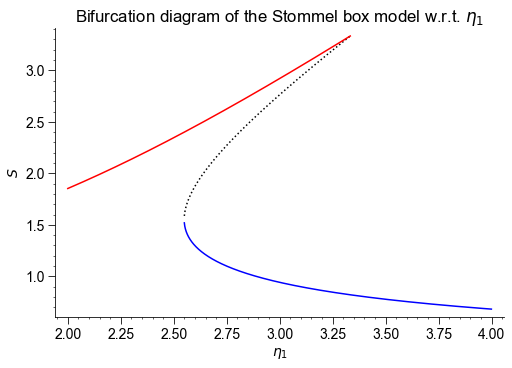

In [6]:
e1 = 3
e2 = 1
e3 = 0.3
BP = 0 # choose bifurcation parameter; 0 = e1, 1 = e2, 2 = e3
WTP = 0 # choose what you want to plot: 0 = S, 1 = T, 2 = q (=T-S)

TL = eq_type(e2, e3, BP, WTP) # retrieve equilibrium information
WTP_dict = {0: 'S', 1: 'T', 2: 'q'} # translate plot choice for figure

plt.figure(figsize=(7,5))
plt.title(f'Bifurcation diagram of the Stommel box model w.r.t. $\eta_{BP+1}$')
plt.xlabel(f'$\eta_{BP+1}$')
plt.ylabel(f'${WTP_dict[WTP]}$')
plt.plot(TL[0], TL[1], linestyle=':', color='k')
plt.plot(TL[2], TL[3], linestyle=':')
plt.plot(TL[4], TL[5], color='b')
plt.plot(TL[6], TL[7], linestyle=':')
plt.plot(TL[8], TL[9], color='r')
plt.show()